In [27]:
# Libraries
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, LSTM, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.regularizers import l2
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score
import matplotlib.pylab as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import HistGradientBoostingRegressor
#from plotting import learning_curve, regression_curve

### Plotting 

In [28]:
def learning_curve(train, test, title, x_label, y_label):
    plt.figure()
    plt.plot(train)
    plt.plot(test)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(['Training set', 'Testing set'], loc='best')
    plt.show()


# In[4]:


def regression_curve(original, predicted, left=None, right=None):
    plt.figure()
    plt.plot(original[left:right])
    plt.plot(predicted[left:right])
    plt.title('Results of the regression')
    plt.xlabel('Time')
    plt.ylabel('Time Series Value')
    plt.legend(['Initial data', 'Forecasting results'], loc='best')
    plt.show()

### Loading the Data

In [29]:
# Uploading the Data
initial_data = pd.read_csv("C:\\Users\\DELL\\Desktop\\SDA Materials\\LSTM Practice Model\\EURO.csv")["Close"]
initial_data = pd.DataFrame(initial_data)

# Fit and transform the data
# scaler = MinMaxScaler()
# initial_data = scaler.fit_transform(initial_data)
# initial_data = pd.DataFrame(initial_data, columns=["Close"])
initial_data = initial_data#.pct_change().dropna()
initial_data = initial_data.dropna()

In [30]:
# Creating the Test and Training sets 
train = 0.8
test = 1 - train

# Training Data
training_data = initial_data[:int(len(initial_data)*train)]
# Testing Data
test_data = initial_data[int(len(initial_data)*train):].reset_index()

In [31]:
test_data.Close

0      1.166466
1      1.160106
2      1.161548
3      1.158655
4      1.163521
         ...   
951    1.071421
952    1.064362
953    1.055509
954    1.050420
955    1.052521
Name: Close, Length: 956, dtype: float64

In [32]:
# Creating the x_test and the rest of the input data

    # Features 
feature_length = 15
forecast_delay = 0

    # Lists
x_train = []
x_test = []
y_train = []
y_test = []

    # Quick data assertion check
assert len(training_data) > feature_length + forecast_delay

    # Creation of the training data
for i in range(len(training_data)-feature_length-forecast_delay):
    x_train.append(training_data.iloc[i:i+feature_length].Close.tolist())
    y_train.append(training_data.iloc[i+feature_length+forecast_delay].Close)
    
    # if x_train[-1][-1] < training_data.Close[i + feature_length + forecast_delay - 1]: 
    #     y_train.append([1,0])
    # else:
    #     y_train.append([0,1])

    # Creation of the test data
for i in range(len(test_data)-feature_length-forecast_delay):
    x_test.append(test_data.iloc[i:i+feature_length].Close.tolist())
    y_test.append(test_data.iloc[i+feature_length+forecast_delay].Close)


    # if x_test[-1][-1] < test_data.Close[i + feature_length + forecast_delay - 1]: 
    #     y_test.append([1,0])
    # else:
    #     y_test.append([0,1])

    # Shuffling the Data

x_train_shuffled = []
y_train_shuffled = []

for i in range(len(x_train)): #np.random.choice(range(0, len(x_train)), len(x_train), replace=False) 
    x_train_shuffled.append(x_train[i])
    y_train_shuffled.append(y_train[i])



In [8]:
# # Noralizing the Data
# mean = np.mean(x_train_shuffled)
# std = np.std(x_train_shuffled)

# x_train_shuffled = [(np.array(i) - mean) / std for i in x_train_shuffled]
# print(pd.DataFrame(x_train_shuffled))

# Models

##### LSTM Model

In [33]:
# Model  LSTM

# type task 
type_task = 'regression'

# Model initialize
model = Sequential()
model.add(LSTM(150, input_shape=(feature_length, 1))) #, activity_regularizer=l2(0.01)
#model.add(BatchNormalization())
optimizer = Adam(learning_rate=0.00001)

if type_task == 'regression':
    model.add(Dense(1))
    model.add(Activation('linear'))
    model.compile(optimizer, loss='mean_squared_error', metrics=['mae'])
elif type_task == 'classification':
    model.add(Dense(2))
    model.add(Activation('softmax'))
    model.compile(optimizer, loss='categorical_crossentropy',metrics=['accuracy'])

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


##### MLP Model

In [34]:
# Model2
model2 = Sequential()
model2.add(Dense(64, activation='relu', input_shape=(feature_length,)))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mse')

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Fitting

##### LSTM Fit

In [35]:
# Preparing the data for fitting
x_train_shuffled = np.array(x_train_shuffled)
x_test = np.array(x_test)
y_train_shuffled = np.array(y_train_shuffled)
y_test = np.array(y_test)
x_train_shuffled

# Fitting the LSTM Model 
model.fit(x_train_shuffled, x_train_shuffled, epochs=20) #callbacks=[ReduceLROnPlateau()]

Epoch 1/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 1.5290 - mae: 1.2297
Epoch 2/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.9528 - mae: 0.9697
Epoch 3/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.4859 - mae: 0.6903
Epoch 4/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1480 - mae: 0.3758
Epoch 5/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0139 - mae: 0.1105
Epoch 6/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.8402e-04 - mae: 0.0154
Epoch 7/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.8122e-04 - mae: 0.0095
Epoch 8/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.8564e-04 - mae: 0.0097
Epoch 9/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.8979e-04 - mae: 0.0097
Epoch 10/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.8030e-04 - mae: 0.0095
Epoch 11/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.8256e-04 - mae: 0.0095
Epoch 12/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.8428e-04 - mae:

### MLP Fit

In [36]:
# Preparing the data for fitting
x_train_shuffled = np.array(x_train_shuffled)
x_test = np.array(x_test)
y_train_shuffled = np.array(y_train_shuffled)
y_test = np.array(y_test)
x_train_shuffled

# Train the model
model2.fit(x_train_shuffled, y_train_shuffled, epochs=50) #, validation_split=0.2, verbose=0

Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.2928
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.0097e-04
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.5395e-04
Epoch 4/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.4472e-04
Epoch 5/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.4157e-04
Epoch 6/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.2319e-04
Epoch 7/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.6320e-04
Epoch 8/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.9903e-04
Epoch 9/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.2444e-04
Epoch 10/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.3154e-04
Epoch 11/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.2200e-04
Epoch 12/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.4423e-04
Epoch 13/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.2501e-04
Epoch 14/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.4639e-04
Epoch

In [37]:
# Make a prediction
predictions = model2.predict(x_test)
df_predictions2 = pd.DataFrame(predictions)

# Evaluate the model MLP
loss = model2.evaluate(x_test, y_test, verbose=0)
print(f'Test Loss: {loss}')

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Test Loss: 6.018838030286133e-05


# Visualizations 

###### MLP 

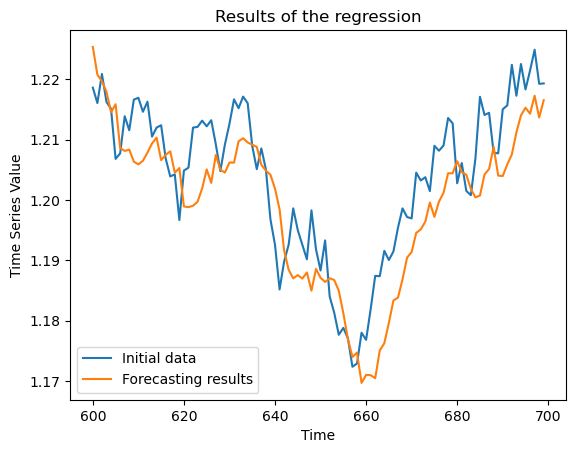

In [38]:
# MLP model visualization 
y = pd.DataFrame(y_test)
regression_curve(y, df_predictions2, left=600, right=700) 

### LSTM Visualizations

In [39]:
predictions = model.predict(x_test)
df_predictions = pd.DataFrame(predictions)
df_predictions

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


,0
0,1.164946
1,1.165381
2,1.166375
3,1.167437
4,1.168713
...,...
936,1.088779
937,1.087663
938,1.086527
939,1.084939


In [16]:
test = pd.DataFrame(test_data.Close)
test

,Close
0,1.166466
1,1.160106
2,1.161548
3,1.158655
4,1.163521
...,...
951,1.071421
952,1.064362
953,1.055509
954,1.050420


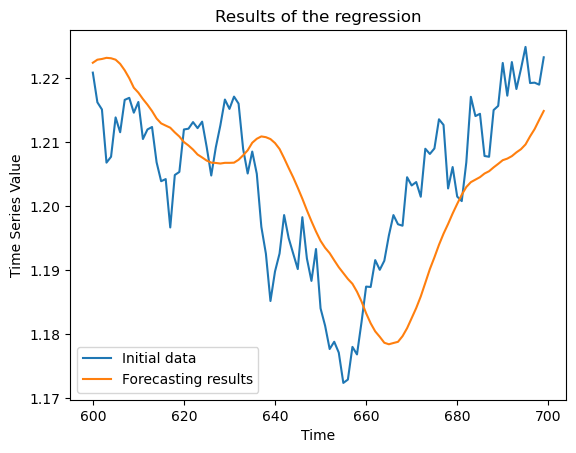

In [15]:
regression_curve(y, df_predictions, left=600, right=700) 

Analize te loss ne train dhe validation
introduce early stopping
Smape Metric
learning rate
batch normalization
Tree Based Model

# HistGradientBoostingRegressor

### Data Prepearation

In [121]:
# Uploading the Data
initial_data = pd.read_csv("C:\\Users\\DELL\\Desktop\\SDA Materials\\LSTM Practice Model\\EURO.csv")["Close"] #C:\\Users\\DELL\\Desktop\\SDA Materials\\LSTM Practice Model\\NVDA.csv
initial_data = pd.DataFrame(initial_data)

#Fit and transform the data
scaler = MinMaxScaler()
initial_data = scaler.fit_transform(initial_data)
initial_data = pd.DataFrame(initial_data, columns=["Close"])
initial_data_HGBP = initial_data.pct_change().dropna()
initial_data_HGBP.isna().any()
#initial_data_HGBP = initial_data_HGBP.dropna(subset="pct_change")

C:\Users\DELL\AppData\Local\Temp\ipykernel_20020\494410427.py:9: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  initial_data_HGBP = initial_data.pct_change().dropna()


Close    False
dtype: bool

In [122]:
# Creating the Test and Training sets 
train = 0.8
test = 1 - train
#initial_data_HGBP = initial_data
# Training Data
training_data_HGBP = initial_data_HGBP[:int(len(initial_data_HGBP)*train)]
# Testing Data
test_data_HGBP = initial_data_HGBP[int(len(initial_data_HGBP)*train):].reset_index()

In [123]:
# Creating the x_test and the rest of the input data

    # Features 
feature_length = 15
forecast_delay = 0

    # Lists
x_train_HGBP = []
x_test_HGBP = []
y_train_HGBP = []
y_test_HGBP = []

    # Quick data assertion check
assert len(training_data) > feature_length + forecast_delay

    # Creation of the training data
for i in range(len(training_data_HGBP)-feature_length-forecast_delay):
    x_train_HGBP.append(training_data_HGBP.iloc[i:i+feature_length].Close.tolist())
    y_train_HGBP.append(training_data_HGBP.iloc[i+feature_length+forecast_delay].Close)
    
    # if x_train[-1][-1] < training_data.Close[i + feature_length + forecast_delay - 1]: 
    #     y_train.append([1,0])
    # else:
    #     y_train.append([0,1])

    # Creation of the test data
for i in range(len(test_data_HGBP)-feature_length-forecast_delay):
    x_test_HGBP.append(test_data_HGBP.iloc[i:i+feature_length].Close.tolist())
    y_test_HGBP.append(test_data_HGBP.iloc[i+feature_length+forecast_delay].Close)


    # if x_test[-1][-1] < test_data.Close[i + feature_length + forecast_delay - 1]: 
    #     y_test.append([1,0])
    # else:
    #     y_test.append([0,1])

    # Shuffling the Data

x_train_shuffled_HGBP = []
y_train_shuffled_HGBP = []

for i in range(len(x_train_HGBP)): #np.random.choice(range(0, len(x_train)), len(x_train), replace=False) 
    x_train_shuffled_HGBP.append(x_train_HGBP[i])
    y_train_shuffled_HGBP.append(y_train_HGBP[i])



In [119]:
x_train_shuffled_HGBP

array([[0.28129293, 0.30343849, 0.30951441, ..., 0.35936515, 0.36310967,
        0.35631915],
       [0.30343849, 0.30951441, 0.30200393, ..., 0.36310967, 0.35631915,
        0.35881669],
       [0.30951441, 0.30200393, 0.3209427 , ..., 0.35631915, 0.35881669,
        0.35900963],
       ...,
       [0.23527247, 0.23209427, 0.22785489, ..., 0.17040255, 0.17524221,
        0.18709212],
       [0.23209427, 0.22785489, 0.21358425, ..., 0.17524221, 0.18709212,
        0.19667316],
       [0.22785489, 0.21358425, 0.20934844, ..., 0.18709212, 0.19667316,
        0.21192995]])

In [127]:
# Preparing the data for fitting
x_train_shuffled_HGBP = np.array(x_train_shuffled_HGBP)
x_test_HGBP = np.array(x_test_HGBP)


y_train_shuffled_HGBP = np.array(y_train_shuffled_HGBP)
y_train_shuffled_HGBP = y_train_shuffled_HGBP[~np.isinf(y_train_shuffled_HGBP)]#.reset_index(drop=True)


y_test_HGBP = np.array(y_test_HGBP)

In [129]:
# HistGradientBoostingRegressor Model
model_HGBP = HistGradientBoostingRegressor()

model_HGBP.fit(x_train_shuffled_HGBP[:-1], y_train_shuffled_HGBP)

HistGradientBoostingRegressor()

In [56]:
k = pd.DataFrame(y_train_shuffled_HGBP)

k = k.sort_values(by=[0])

In [63]:
y_train_shuffled_HGBP

array([False, False, False, ..., False, False, False])

In [98]:
np.isinf(k).all()

0    False
dtype: bool

In [130]:
predictions3 = model_HGBP.predict(x_test_HGBP)
predictions3 = pd.DataFrame(predictions3)

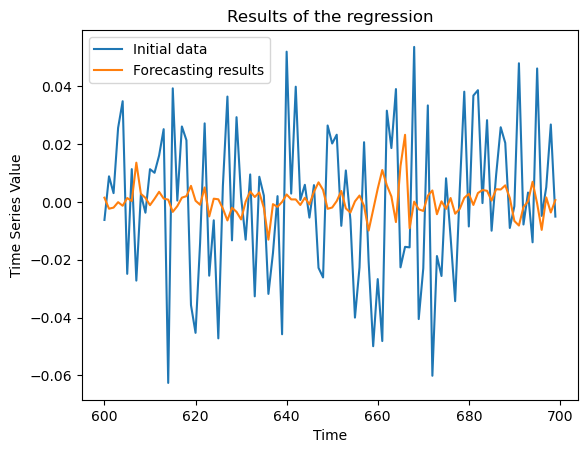

In [131]:
regression_curve(test_data_HGBP.Close, predictions3, left=600, right=700) 